In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
import random
import scipy.io as sio

In [48]:
from enum import Enum

class COLOR1(Enum):
    RED = 1
    GREEN = 2

class COLOR2(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3
    YELLOW = 4
    MAGENTA = 5
    CYAN = 6
    WHITE = 7
    BLACK = 8

In [49]:
wifi = sio.loadmat('wifi.mat')['wifi']
coords = sio.loadmat('coords.mat')['coords']

### Problem a

In [163]:
def P1(G,node, cost, t):
    eta = t / 100
    P = []

    denominator =  0
    for s in list(COLOR1):
        denominator += np.exp(- eta * sum([cost(s, G.nodes[neigh]['state']) for neigh in G.neighbors(node)]))

    for color in list(COLOR1):
        nominator =  np.exp(- eta * sum([cost(color, G.nodes[neigh]['state']) for neigh in G.neighbors(node)]))
        P.append(nominator / denominator)
    
    return P

def P2(G,node, cost, t):
    eta = t / 100
    P = []

    denominator =  0
    for s in list(COLOR2):
        denominator += np.exp(- eta * sum([cost(s, G.nodes[neigh]['state']) for neigh in G.neighbors(node)]))
        
    for color in list(COLOR2):
        nominator =  np.exp(- eta * sum([cost(color, G.nodes[neigh]['state']) for neigh in G.neighbors(node)]))
        P.append(nominator / denominator)
    
    return P

def U(G, cost):
    value = 0
    for node in G.nodes:
        value += sum([cost(G.nodes[node]['state'], G.nodes[neigh]['state']) for neigh in G.neighbors(node)])
    
    return 1 / 2 * value


def cost1(a: COLOR, b: COLOR):
    return 1 if a == b else 0

def cost2(a: COLOR, b:COLOR):
    value = None

    if a == b:
        value = 2
    elif np.abs(a.value - b.value) == 1:
        value = 1
    else:
        value = 0

    return value


In [105]:
nodes = np.arange(10)
G = nx.Graph()
G.add_nodes_from(nodes)

edges = []
for i in range(9):
    edges.append((i, i+ 1))

G.add_edges_from(edges)

for node in G.nodes:
    G.nodes[node]['state'] = COLOR1.RED



print([G.nodes[node]['state'].value for node in G.nodes])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [106]:
t = 1
potential = []

while True:
    id = random.choice(list(G.nodes))

    p =  P1(G, id, cost1, t)
    color = np.random.choice(list(COLOR1), p = p)

    G.nodes[id]['state'] = color

    u = U(G, cost1)
    potential.append(u)
    if u == 0:
        break

    

    t += 1

print(f'time-step : {t}')
print([G.nodes[node]['state'].value for node in G.nodes])    

time-step : 360
[2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


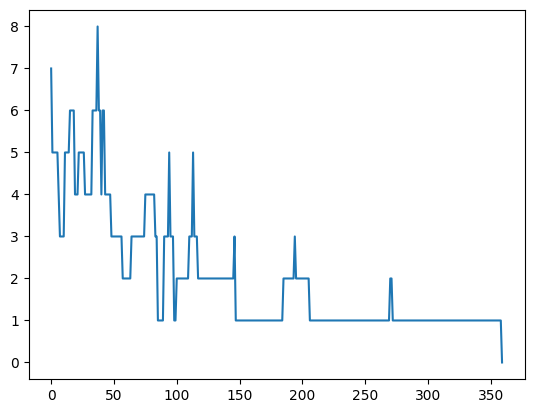

In [107]:
plt.plot(potential)

### Problem b

In [164]:
G2 = nx.from_numpy_array(wifi)
for node in G2.nodes:
    G2.nodes[node]['state'] = COLOR2.RED

In [165]:
t = 1
potential = []

while True:
    id = random.choice(list(G2.nodes))

    p =  P2(G2, id, cost2, t)
    color = np.random.choice(list(COLOR2), p = p)

    G2.nodes[id]['state'] = color

    u = U(G2, cost2)
    potential.append(u)
    if u < 1 or t > 1000:
        break

    

    t += 1

print(f'time-step : {t}')
print([G2.nodes[node]['state'].value for node in G2.nodes])    

time-step : 1001
[1, 1, 8, 7, 7, 2, 6, 6, 4, 4, 8, 4, 3, 3, 4, 1, 6, 6, 4, 8, 8, 1, 4, 6, 8, 1, 3, 5, 4, 8, 2, 3, 1, 7, 7, 4, 5, 6, 1, 5, 1, 3, 2, 1, 8, 4, 1, 5, 1, 5, 3, 7, 5, 3, 8, 5, 8, 1, 6, 6, 2, 6, 6, 8, 2, 1, 1, 2, 2, 3, 7, 3, 2, 6, 8, 5, 7, 1, 1, 4, 5, 5, 5, 1, 6, 8, 5, 1, 4, 3, 2, 3, 8, 4, 3, 5, 1, 8, 1, 1]


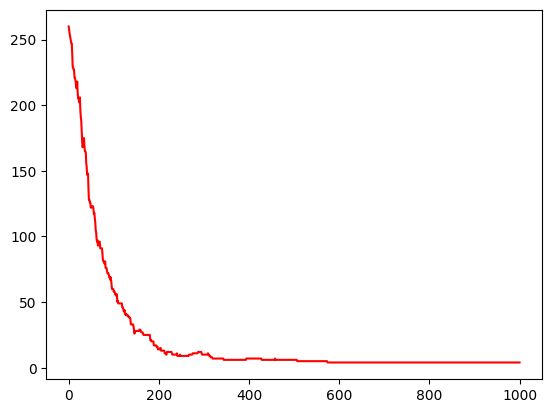

In [169]:
plt.plot(potential, color = 'red')

In [168]:
min(potential)

4.0

In [170]:
G2 = nx.from_numpy_array(wifi)
for node in G2.nodes:
    G2.nodes[node]['state'] = COLOR2.GREEN

In [171]:
t = 1
potential = []

while True:
    id = random.choice(list(G2.nodes))

    p =  P2(G2, id, cost2, t)
    color = np.random.choice(list(COLOR2), p = p)

    G2.nodes[id]['state'] = color

    u = U(G2, cost2)
    potential.append(u)
    if u < 1 or t > 1000:
        break

    

    t += 1

print(f'time-step : {t}')
print([G2.nodes[node]['state'].value for node in G2.nodes])   

time-step : 1001
[5, 7, 7, 1, 3, 3, 2, 8, 5, 8, 6, 1, 2, 1, 2, 6, 3, 1, 8, 6, 8, 6, 7, 6, 5, 2, 3, 4, 6, 8, 2, 8, 8, 6, 4, 7, 6, 3, 4, 1, 1, 6, 7, 5, 8, 1, 5, 1, 8, 5, 5, 3, 8, 4, 3, 1, 3, 5, 3, 1, 6, 1, 1, 5, 6, 6, 7, 5, 3, 3, 4, 2, 5, 8, 8, 8, 1, 4, 2, 3, 8, 4, 3, 6, 3, 3, 3, 3, 8, 6, 5, 8, 1, 5, 6, 8, 1, 1, 6, 8]


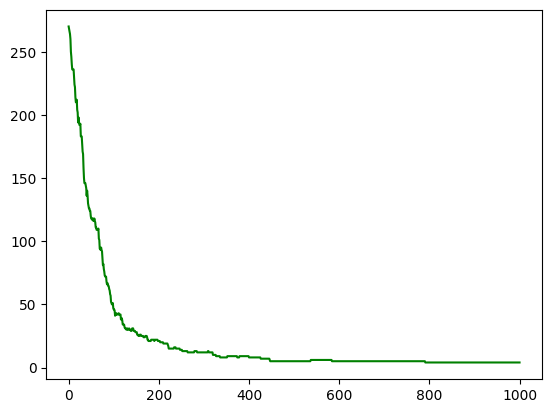

In [172]:
plt.plot(potential, color = 'green')

In [173]:
min(potential)

4.0